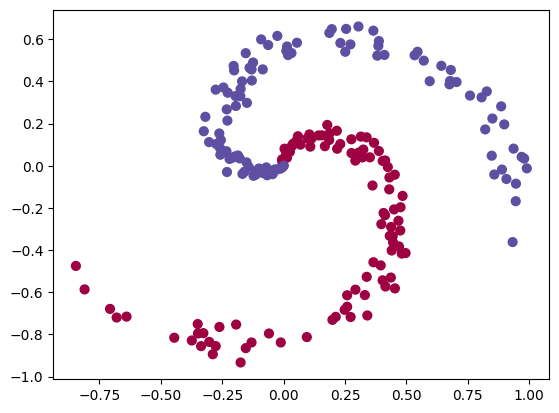

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

y = np.where(y == 0, -1, 1)

**Plotting the decision regions**

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

**Implementing the RBF-kernel-SVM learning algorithm**

In [ ]:
import numpy as np

class RBFKernelSVM:
    def __init__(self, n_iter=50, learning_rate=0.1, regularization=0.01, scale=1.0):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.regularization = regularization
        self.scale = scale

    def fit(self, X, y):
        m = X.shape[0]
        self.a_ = np.zeros(m)
        self.b_ = 0.0
        self.yi = y
        self.Xi = X
        Ki_matrix = self.K_matrix(X, X)

        for _ in range(self.n_iter):
            decision = np.dot(Ki_matrix, self.a_ * y) + self.b_
            condition = y * decision
            delta = np.where(condition <= 1, 1, 0)
            self.a_ = (1 - self.learning_rate * self.regularization) * self.a_ + (self.learning_rate / m) * delta
            self.b_ += (self.learning_rate / m) * np.sum(y * delta)
        return self

    def K_matrix(self, X, Y):
        Xs = np.sum(X**2, axis=1).reshape(-1, 1)
        Ys = np.sum(Y**2, axis=1)
        dists = Xs + Ys - 2 * np.dot(X, Y.T)
        return np.exp(-dists / (2 * self.scale**2))

    def net_input(self, X):
        Kt_matrix = self.K_matrix(X, self.Xi)
        return np.dot(Kt_matrix, self.a_ * self.yi) + self.b_

    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)

    def get_error_rate(self, X, y):
        return sum(self.predict(X) != y)/len(y)


**Training an RBF-kernel-SVM classifier**

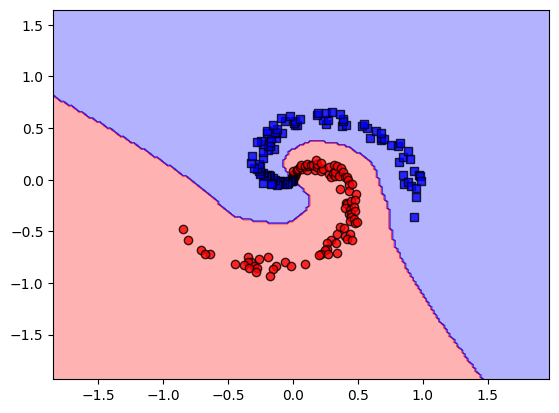

The error rate is 0.50%


In [ ]:
svm = RBFKernelSVM(100, 0.1, 0.6, 0.1)
svm.fit(X, y)
plot_decision_regions(X, y, svm)
plt.show()
print(f"The error rate is {(100*svm.get_error_rate(X, y)):.2f}%")

**Testing learned RBF-kernel-SVM classifier**

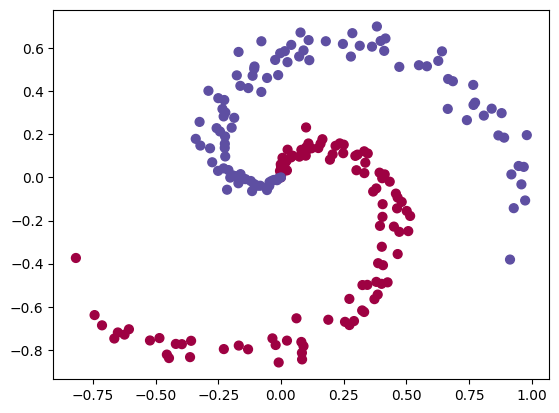

In [ ]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X_test = np.zeros((N*K,D)) # data matrix (each row = single example)
y_test = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X_test[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y_test[ix] = j
# lets visualize the data:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=40, cmap=plt.cm.Spectral)
plt.show()

y_test = np.where(y_test == 0, -1, 1)

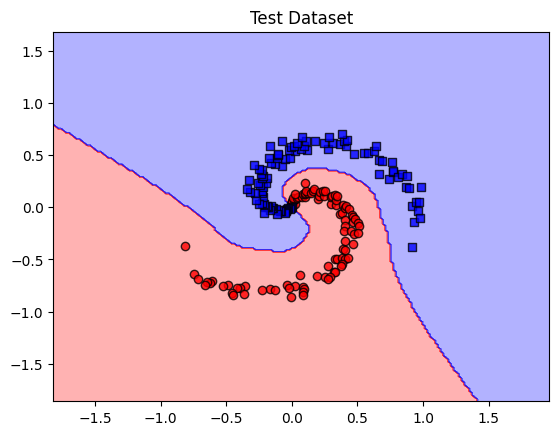

The error rate is 0.50%


In [ ]:
plot_decision_regions(X_test, y_test, svm)
plt.title(f"Test Dataset")
plt.show()
print(f"The error rate is {(100*svm.get_error_rate(X_test, y_test)):.2f}%")